In [14]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt

In [2]:
# getting key
key=pd.read_csv("financeKey.txt",header=None)[0][0]

In [3]:
# extracting data from the internet as a json file
ticker="AAPL"
URL=("https://financialmodelingprep.com/api/v3/income-statement/"+ticker+"?apikey="+key)
data = requests.get(URL).json()

In [4]:
#  function that extracts data from the internet as a json file then turns the json file into pandas dataframe

def createdf(ticker):
    URL=("https://financialmodelingprep.com/api/v3/income-statement/"+ticker+"?apikey="+key)
    data = requests.get(URL).json()
    # turning json file into pandas dataframe
    df=pd.DataFrame(data)
    return(df)

In [5]:
# creating pandas dataframe of Meta's Income statments over the past 5 years

META=createdf("META")
META

,date,symbol,reportedCurrency,cik,fillingDate,acceptedDate,calendarYear,period,revenue,costOfRevenue,...,incomeBeforeTaxRatio,incomeTaxExpense,netIncome,netIncomeRatio,eps,epsdiluted,weightedAverageShsOut,weightedAverageShsOutDil,link,finalLink
0,2024-12-31,META,USD,0001326801,2025-01-30,2025-01-29 20:00:50,2024,FY,164501000000,30161000000,...,0.429560,8303000000,62360000000,0.379086,24.61,23.86,2534000000,2614000000,https://www.sec.gov/Archives/edgar/data/132680...,https://www.sec.gov/Archives/edgar/data/132680...
1,2023-12-31,META,USD,0001326801,2024-02-02,2024-02-01 19:39:02,2023,FY,134902000000,25959000000,...,0.351574,8330000000,39098000000,0.289825,15.19,14.87,2574000000,2629000000,https://www.sec.gov/Archives/edgar/data/132680...,https://www.sec.gov/Archives/edgar/data/132680...
2,2022-12-31,META,USD,0001326801,2023-02-02,2023-02-01 20:26:31,2022,FY,116609000000,25249000000,...,0.247142,5619000000,23200000000,0.198955,8.63,8.59,2687000000,2702000000,https://www.sec.gov/Archives/edgar/data/132680...,https://www.sec.gov/Archives/edgar/data/132680...
3,2021-12-31,META,USD,0001326801,2022-02-03,2022-02-02 21:11:04,2021,FY,117929000000,22649000000,...,0.400953,7914000000,39370000000,0.333845,13.99,13.77,2815000000,2859000000,https://www.sec.gov/Archives/edgar/data/132680...,https://www.sec.gov/Archives/edgar/data/132680...
4,2020-12-31,META,USD,0001326801,2021-01-28,2021-01-27 21:13:48,2020,FY,85965000000,16692000000,...,0.385971,4034000000,29146000000,0.339045,10.22,10.09,2851000000,2888000000,https://www.sec.gov/Archives/edgar/data/132680...,https://www.sec.gov/Archives/edgar/data/132680...


In [6]:
# creating function to prints revenue over the past 4 years and revenue growth over the past 1 year for a given stock
def revenue(ticker):
    stock=createdf(ticker)
    print(ticker)
    print(stock["revenue"])
    print(stock["revenue"][0]/stock["revenue"][1])

In [7]:
revenue("AAPL")

AAPL
0    391035000000
1    383285000000
2    394328000000
3    365817000000
4    274515000000
Name: revenue, dtype: int64
1.020219940775141


In [8]:
# function to show last 4 years of revenue growth
def past4growth(ticker):
    stock=createdf(ticker)
    print(ticker)
    print(stock["revenue"][0]/stock["revenue"][1])
    print(stock["revenue"][1]/stock["revenue"][2])
    print(stock["revenue"][2]/stock["revenue"][3])
    print(stock["revenue"][3]/stock["revenue"][4])

In [9]:
past4growth("AAPL")

AAPL
1.020219940775141
0.9719953946968006
1.077937876041846
1.332593847330747


In [10]:
# function to show median revenue growth
def mediangrowth(ticker):
    stock=createdf(ticker)
    print(ticker)
    g1=(stock["revenue"][0]/stock["revenue"][1])
    g2=(stock["revenue"][1]/stock["revenue"][2])
    g3=(stock["revenue"][2]/stock["revenue"][3])
    g4=(stock["revenue"][3]/stock["revenue"][4])
    data = np.array([g1,g2,g3,g4])
    print(np.median(data))
    return(np.median(data))

In [11]:
mediangrowth("AAPL")
mediangrowth("NVDA")
mediangrowth("MSFT")
mediangrowth("AMZN")
mediangrowth("GOOG")

AAPL
1.0490789084084935
NVDA
1.8780335299340907
MSFT
1.1660084472712438
AMZN
1.1141023318827492
GOOG
1.1182352948330867


1.1182352948330867

In [18]:
# creating function to project next 5 years of revenue
def futurerevenue(ticker):
    stock=createdf(ticker)
    rate=mediangrowth(ticker)
    print(ticker)
    start=int(stock["revenue"][0])
    return[start*rate,start*rate**2,start*rate**3,start*rate**4,start*rate**5]

In [19]:
futurerevenue("AMZN")

AMZN
1.1141023318827492
AMZN


[710751609545.5868,
 791850025584.1556,
 882201960004.7223,
 982863260832.793,
 1095010250815.6974]

AAPL
1.0490789084084935
AAPL
NVDA
1.8780335299340907
NVDA


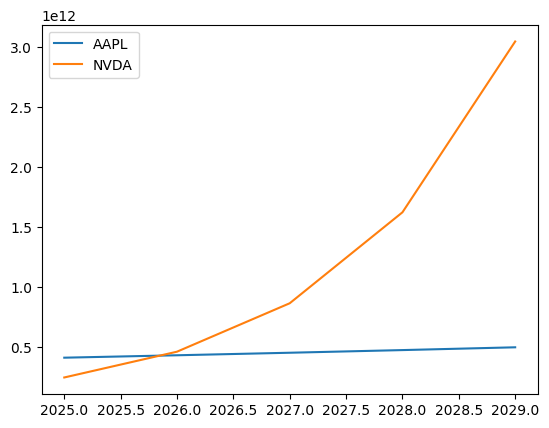

In [27]:
plt.plot([2025,2026,2027,2028,2029],futurerevenue("AAPL"))
plt.plot([2025,2026,2027,2028,2029],futurerevenue("NVDA"))
plt.legend(["AAPL","NVDA"])